In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

/tmp/ipykernel_132955/3747012568.py:3: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.2)
  from scipy.special import expit as sigmoid


In [31]:
# 激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def gelu_derivative(x):
    tanh_term = np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3))
    sech2_term = 1 - tanh_term**2
    factor = np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * x**2)
    return 0.5 * tanh_term + 0.5 * x * sech2_term * factor + 0.5

def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

def selu(x, lambda_=1.0507, alpha=1.67326):
    return np.where(x > 0, lambda_ * x, lambda_ * alpha * (np.exp(x) - 1))

def selu_derivative(x, lambda_=1.0507, alpha=1.67326):
    return np.where(x > 0, lambda_, lambda_ * alpha * np.exp(x))

# Softmax 函数定义
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # 防止指数溢出
    return exp_x / np.sum(exp_x)

# Softmax 对角线导数（梯度）
def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)  # 只计算对角线部分


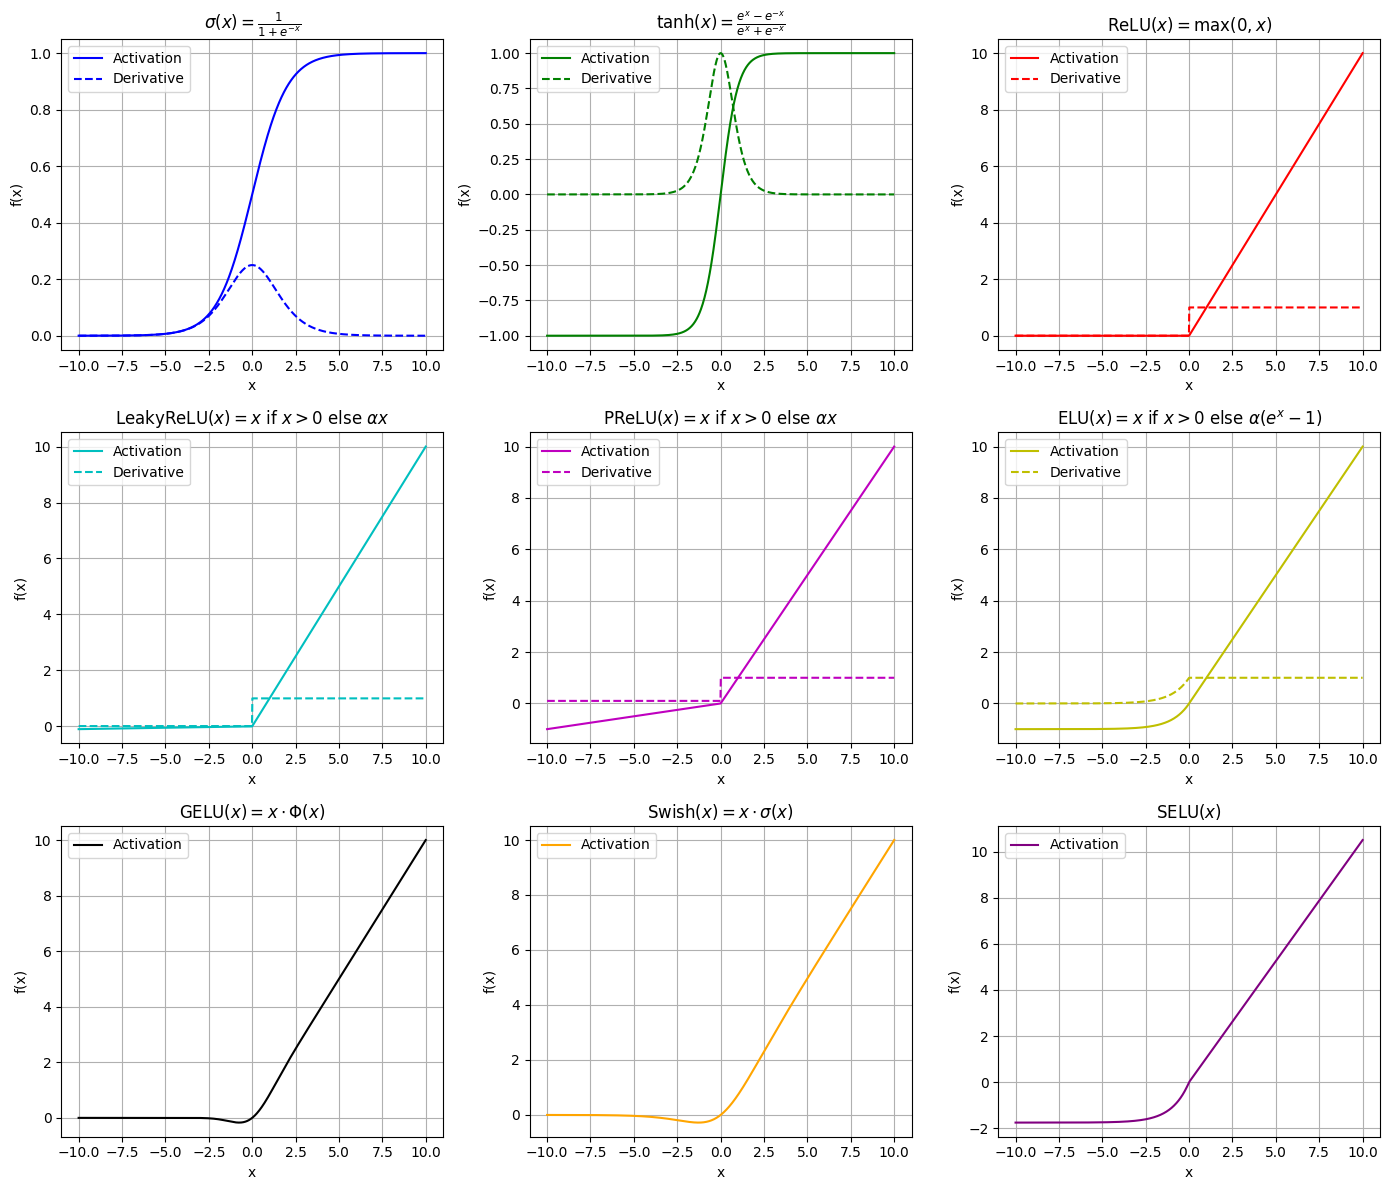

In [32]:
# 绘制
x = np.linspace(-10, 10, 1000)
plt.figure(figsize=(14, 12))

functions = [
    sigmoid, tanh, relu, leaky_relu, prelu, elu, gelu, swish, selu
]
derivatives = [
    sigmoid_derivative, tanh_derivative, relu_derivative, leaky_relu_derivative,
    prelu_derivative, elu_derivative, None, None, None
]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

# 更新后的公式标题
formulas = [
    r"$\sigma(x) = \frac{1}{1 + e^{-x}}$",  # Sigmoid
    r"$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$",  # Tanh
    r"$\text{ReLU}(x) = \max(0, x)$",  # ReLU
    r"$\text{LeakyReLU}(x) = x \text{ if } x > 0 \text{ else } \alpha x$",  # Leaky ReLU
    r"$\text{PReLU}(x) = x \text{ if } x > 0 \text{ else } \alpha x$",  # PReLU
    r"$\text{ELU}(x) = x \text{ if } x > 0 \text{ else } \alpha (e^x - 1)$",  # ELU
    r"$\text{GELU}(x) = x \cdot \Phi(x)$",  # GELU
    r"$\text{Swish}(x) = x \cdot \sigma(x)$",  # Swish
    r"$\text{SELU}(x)$"  # SELU
]

for i, (func, derivative, color, formula) in enumerate(zip(functions, derivatives, colors, formulas)):
    plt.subplot(3, 3, i + 1)
    plt.plot(x, func(x), color, label="Activation")
    if derivative is not None:
        plt.plot(x, derivative(x), color, linestyle='--', label="Derivative")
    plt.title(formula, fontsize=12)  # 使用公式作为标题
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

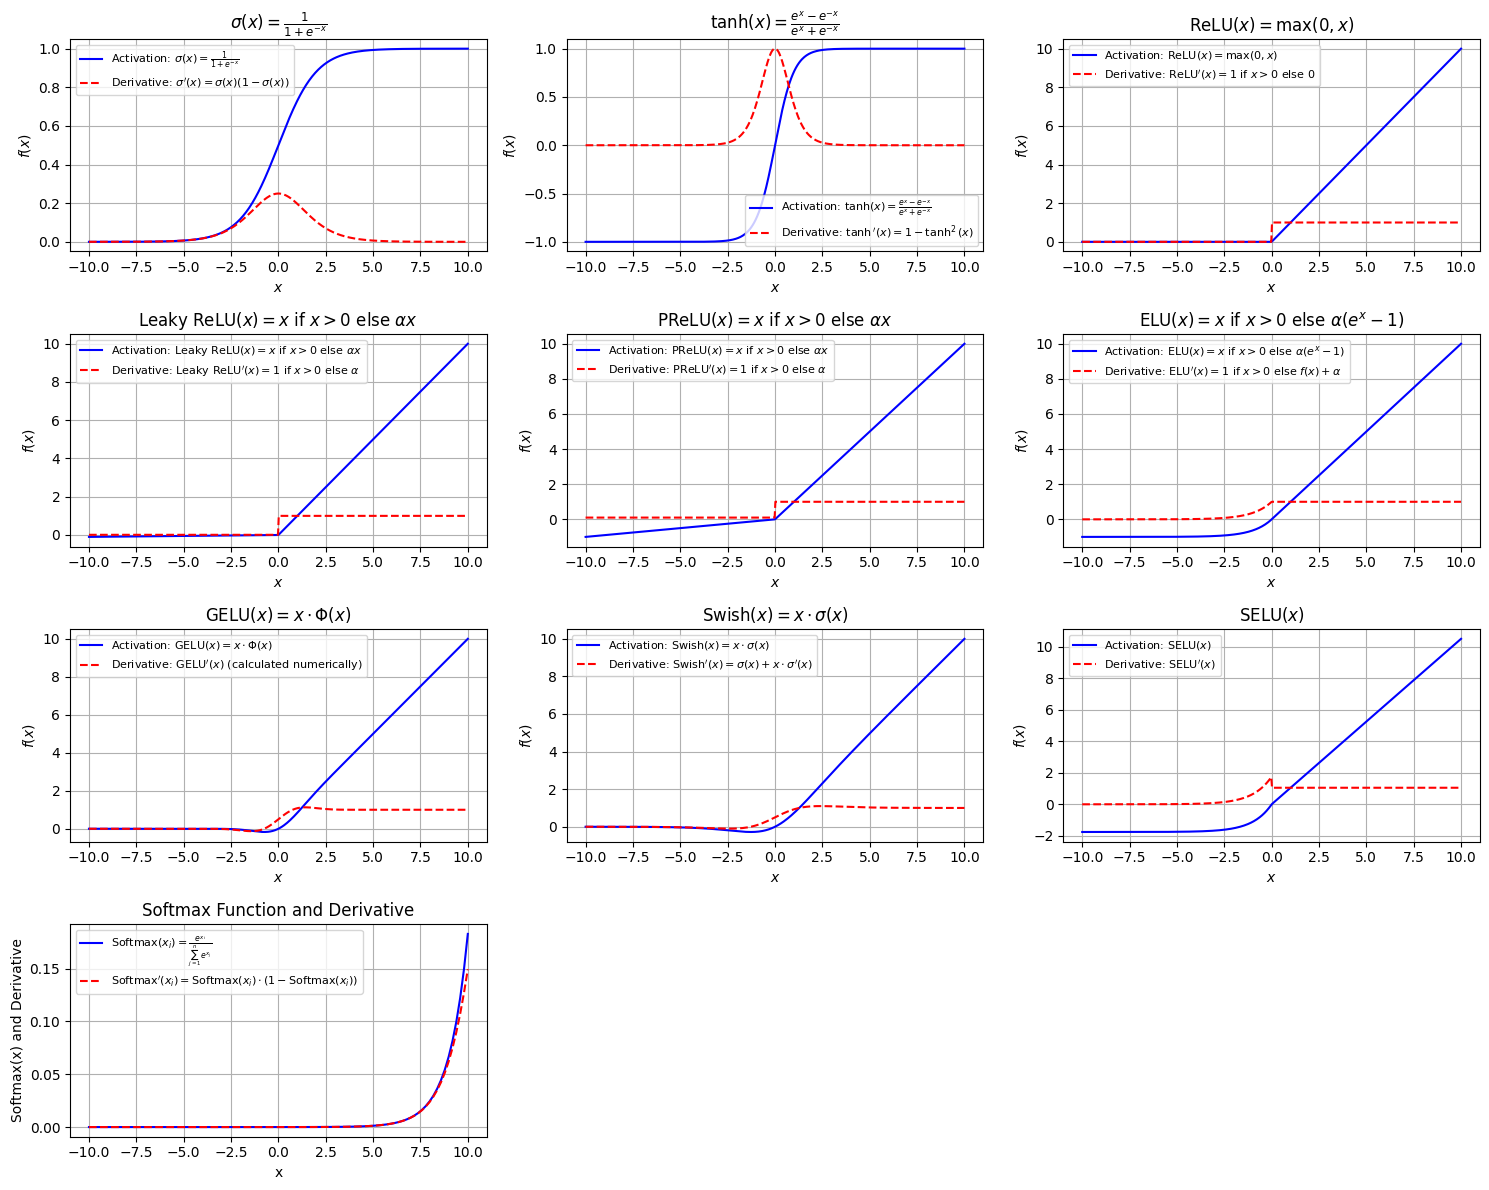

In [34]:
# 函数及其导数列表
functions = [
    (sigmoid, sigmoid_derivative, r"$\sigma(x) = \frac{1}{1 + e^{-x}}$", r"$\sigma'(x) = \sigma(x)(1 - \sigma(x))$"),
    (tanh, tanh_derivative, r"$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$", r"$\tanh'(x) = 1 - \tanh^2(x)$"),
    (relu, relu_derivative, r"$\text{ReLU}(x) = \max(0, x)$", r"$\text{ReLU}'(x) = 1 \text{ if } x > 0 \text{ else } 0$"),
    (leaky_relu, leaky_relu_derivative, r"$\text{Leaky ReLU}(x) = x \text{ if } x > 0 \text{ else } \alpha x$", r"$\text{Leaky ReLU}'(x) = 1 \text{ if } x > 0 \text{ else } \alpha$"),
    (prelu, prelu_derivative, r"$\text{PReLU}(x) = x \text{ if } x > 0 \text{ else } \alpha x$", r"$\text{PReLU}'(x) = 1 \text{ if } x > 0 \text{ else } \alpha$"),
    (elu, elu_derivative, r"$\text{ELU}(x) = x \text{ if } x > 0 \text{ else } \alpha (e^x - 1)$", r"$\text{ELU}'(x) = 1 \text{ if } x > 0 \text{ else } f(x) + \alpha$"),
    (gelu, gelu_derivative, r"$\text{GELU}(x) = x \cdot \Phi(x)$", r"$\text{GELU}'(x)$ (calculated numerically)"),
    (swish, swish_derivative, r"$\text{Swish}(x) = x \cdot \sigma(x)$", r"$\text{Swish}'(x) = \sigma(x) + x \cdot \sigma'(x)$"),
    (selu, selu_derivative, r"$\text{SELU}(x)$", r"$\text{SELU}'(x)$"),
]

# 绘制函数及其导数
x = np.linspace(-10, 10, 500)
plt.figure(figsize=(15, 12))

for i, (func, derivative, formula, derivative_formula) in enumerate(functions):
    plt.subplot(4, 3, i + 1)
    # 绘制激活函数
    plt.plot(x, func(x), label=f"Activation: {formula}", color="blue")
    # 绘制导数
    if derivative is not None:
        plt.plot(x, derivative(x), label=f"Derivative: {derivative_formula}", color="red", linestyle="--")
    # 设置标题和标签
    plt.title(formula, fontsize=12)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")
    # 添加图例
    plt.legend(fontsize=8)
    plt.grid(True)

# 绘制 Softmax 函数及其导数在同一子图中
softmax_x = np.linspace(-10, 10, 100)  # 输入范围
softmax_values = softmax(softmax_x)  # Softmax 输出
softmax_gradients = softmax_derivative(softmax_x)  # Softmax 的导数

# 子图 10：Softmax 函数与导数
plt.subplot(4, 3, 10)
plt.plot(softmax_x, softmax_values, label=r"$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$", color="blue")
plt.plot(softmax_x, softmax_gradients, label=r"$\text{Softmax}'(x_i) = \text{Softmax}(x_i) \cdot (1 - \text{Softmax}(x_i))$", color="red", linestyle="--")
plt.title("Softmax Function and Derivative", fontsize=12)
plt.xlabel("x", fontsize=10)
plt.ylabel("Softmax(x) and Derivative", fontsize=10)
plt.legend(fontsize=8)
plt.grid()

# 调整布局并显示
plt.tight_layout()
plt.show()

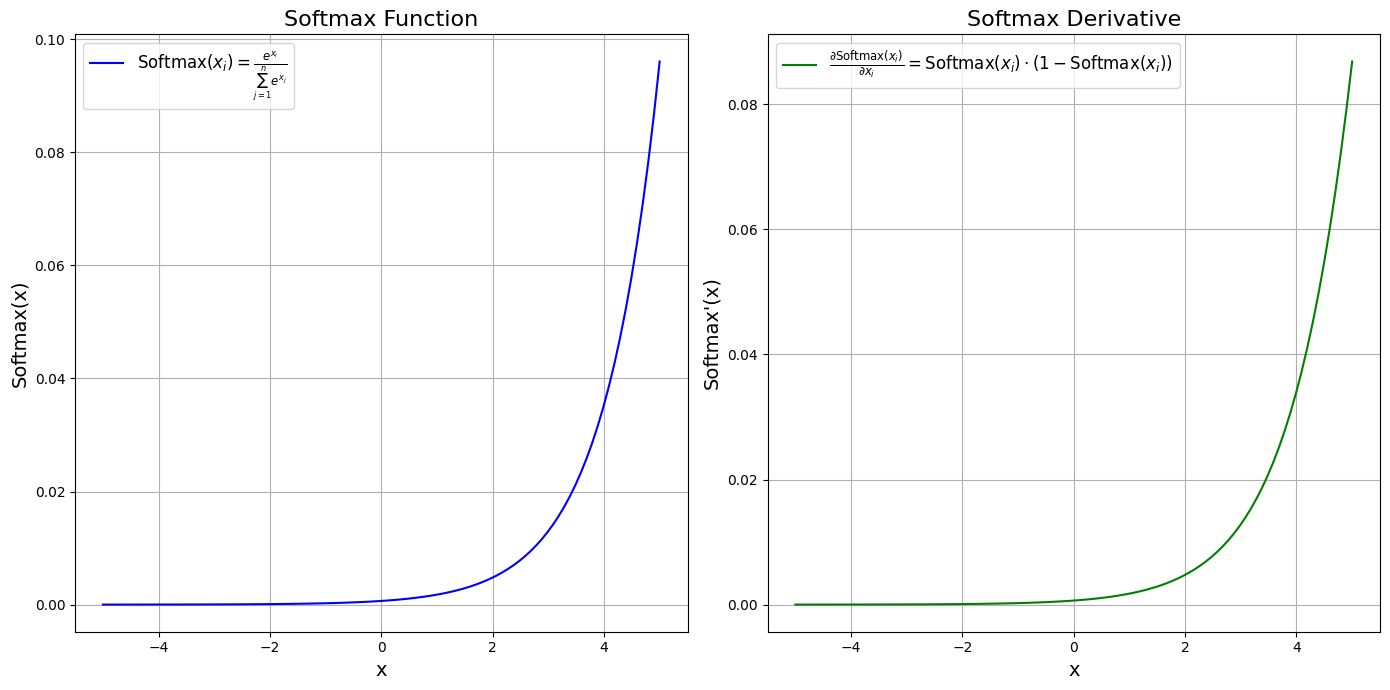

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax 函数定义
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # 防止指数溢出
    return exp_x / np.sum(exp_x)

# Softmax 对角线导数（梯度）
def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)  # 只计算对角线部分

# 准备数据
x = np.linspace(-5, 5, 100)  # 输入范围
softmax_values = softmax(x)  # Softmax 输出
softmax_gradients = softmax_derivative(x)  # Softmax 的导数

# 绘制 Softmax 函数
plt.figure(figsize=(14, 7))

# 子图 1：Softmax 函数
plt.subplot(1, 2, 1)
plt.plot(x, softmax_values, label=r"$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$", color="blue")
plt.title("Softmax Function", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Softmax(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# 子图 2：Softmax 的导数
plt.subplot(1, 2, 2)
plt.plot(x, softmax_gradients, label=r"$\frac{\partial \text{Softmax}(x_i)}{\partial x_i} = \text{Softmax}(x_i) \cdot (1 - \text{Softmax}(x_i))$", color="green")
plt.title("Softmax Derivative", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Softmax'(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# 调整布局并显示
plt.tight_layout()
plt.show()

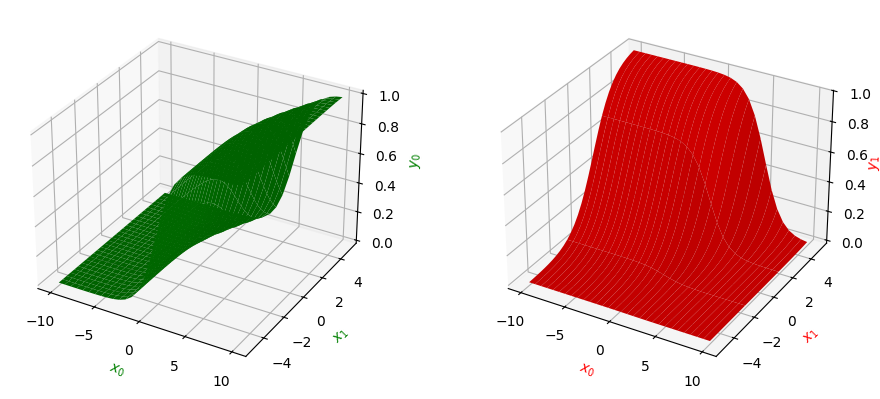

In [35]:
from mpl_toolkits.mplot3d import Axes3D


def softmax(x0, x1, x2):
    m = np.exp(x0) + np.exp(x1) + np.exp(x2)
    return np.exp(x0) / m, np.exp(x1) / m, np.exp(x2) / m


count = 30
x0 = np.linspace(-10, 10, count)
x1 = np.linspace(-5, 5, count)

y = np.zeros((count, count, 3))
for i0 in range(count):
    for i1 in range(count):
        y[i1, i0, :] = softmax(x0[i0], x1[i1], 1)

xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1, projection="3d")
ax1.plot_surface(xx0, xx1, y[:, :, 0], color="g")
ax1.set_xlabel("$x_0$", color="g")
ax1.set_ylabel("$x_1$", color="g")
ax1.set_zlabel("$y_0$", color="g")

ax2 = plt.subplot(1, 2, 2, projection="3d")
ax2.plot_surface(xx0, xx1, y[:, :, 1], color="r", cstride=1)
ax2.set_xlabel("$x_0$", color="r")
ax2.set_ylabel("$x_1$", color="r")
ax2.set_zlabel("$y_1$", color="r")
ax2.zaxis.labelpad=-1

plt.tight_layout()
plt.show()


Unscaled Softmax Entropy - Mean: 3.6847438686019016 Std: 0.11416117557682885
Scaled Softmax Entropy - Mean: 4.1512611998336215 Std: 0.0013221633444739258


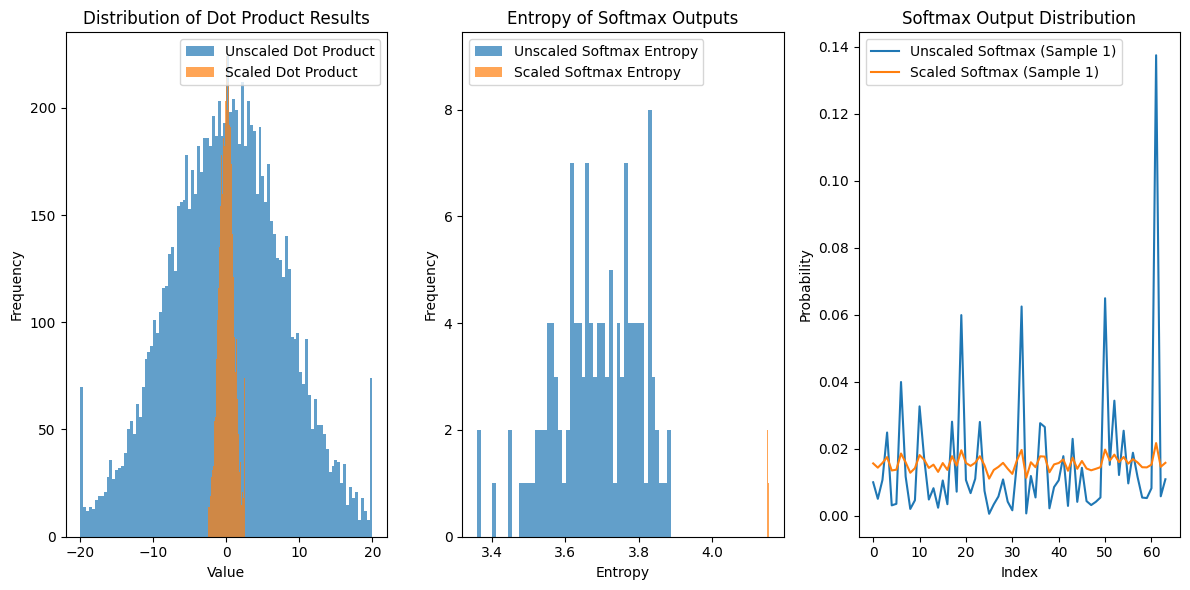

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟点积注意力的输入
def simulate_dot_product_attention(d_k, num_samples=10000):
    """
    模拟点积 QK^T 的结果
    :param d_k: 向量的维度
    :param num_samples: 随机采样的数量
    :return: 未缩放和缩放后的点积结果
    """
    # 随机生成 Q 和 K，服从标准正态分布 N(0, 1)
    Q = np.random.randn(num_samples, d_k)
    K = np.random.randn(num_samples, d_k)
    
    # 计算点积 QK^T
    dot_product = np.sum(Q * K, axis=1)  # 点积操作
    # 限制点积结果的范围（模拟实际中更合理的范围）
    dot_product = np.clip(dot_product, -20, 20)
    scaled_dot_product = dot_product / np.sqrt(d_k)  # 缩放操作
    
    return dot_product, scaled_dot_product

# Softmax 函数
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # 减去最大值，数值稳定性
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

# 计算熵（衡量分布的平滑性）
def compute_entropy(distribution):
    """
    计算分布的熵（entropy），用来衡量分布的平滑性
    :param distribution: Softmax 输出的概率分布
    :return: 熵值
    """
    eps = 1e-10  # 避免 log(0)
    return -np.sum(distribution * np.log(distribution + eps), axis=-1)

# 主程序
def main():
    d_k = 64  # 向量维度
    num_samples = 10000  # 样本数量
    
    # 模拟点积注意力
    dot_product, scaled_dot_product = simulate_dot_product_attention(d_k, num_samples)
    
    # 绘制点积结果分布
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.hist(dot_product, bins=100, alpha=0.7, label="Unscaled Dot Product")
    plt.hist(scaled_dot_product, bins=100, alpha=0.7, label="Scaled Dot Product")
    plt.title("Distribution of Dot Product Results")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    
    # 模拟 Softmax 输出的影响
    dot_product_batch = np.random.randn(128, d_k)  # 未缩放点积（小批量）
    dot_product_batch = np.clip(dot_product_batch, -20, 20)  # 限制范围
    scaled_dot_product_batch = dot_product_batch / np.sqrt(d_k)  # 缩放后的点积
    
    # 计算 Softmax 输出
    unscaled_softmax = softmax(dot_product_batch)
    scaled_softmax = softmax(scaled_dot_product_batch)
    
    # 计算熵
    unscaled_entropy = compute_entropy(unscaled_softmax)
    scaled_entropy = compute_entropy(scaled_softmax)
    
    # 打印熵的统计信息
    print("Unscaled Softmax Entropy - Mean:", np.mean(unscaled_entropy), "Std:", np.std(unscaled_entropy))
    print("Scaled Softmax Entropy - Mean:", np.mean(scaled_entropy), "Std:", np.std(scaled_entropy))
    
    # 绘制 Softmax 输出熵的分布
    plt.subplot(1, 3, 2)
    plt.hist(unscaled_entropy, bins=50, alpha=0.7, label="Unscaled Softmax Entropy")
    plt.hist(scaled_entropy, bins=50, alpha=0.7, label="Scaled Softmax Entropy")
    plt.title("Entropy of Softmax Outputs")
    plt.xlabel("Entropy")
    plt.ylabel("Frequency")
    plt.legend()
    
    # 绘制一个样本的 Softmax 输出分布
    plt.subplot(1, 3, 3)
    plt.plot(unscaled_softmax[0], label="Unscaled Softmax (Sample 1)")
    plt.plot(scaled_softmax[0], label="Scaled Softmax (Sample 1)")
    plt.title("Softmax Output Distribution")
    plt.xlabel("Index")
    plt.ylabel("Probability")
    plt.legend()
    
    # 显示图像cd
    plt.tight_layout()
    plt.show()

# 运行主程序
if __name__ == "__main__":
    main()
